# Predictive Maintenance By Sukron Chafidhi

![worker-operating-industrial-machine-metal-workshop.jpg](https://res.cloudinary.com/da0hsihog/image/upload/v1688784159/Portofolio/worker-operating-industrial-machine-metal-workshop_xs2cqt.jpg)
Source by <a href="https://www.freepik.com/free-photo/worker-operating-industrial-machine-metal-workshop_11035743.htm#query=milling%20machine&position=29&from_view=search&track=ais">Image by aleksandarlittlewolf</a> on Freepik

List of Content:
*   [Data Understanding](scrollTo=gcKLFjESZ43X&line=1&uniqifier=1)
  * [Data Loading](#scrollTo=CN6CfDdEaLdk&line=1&uniqifier=1)
  * [Exploratory Data Analysis - Variable Description](#scrollTo=UJ6GRaNuL1s0&line=1&uniqifier=1)
  * [Exploratory Data Analysis - Handle Missing Values and Outliers](#scrollTo=ldk-QI4DsNdq&line=2&uniqifier=1)
  * [Exploratory Data Analysis - Multivariate Analysis](#scrollTo=nd1HvjZ9vSyZ&line=2&uniqifier=1)
*   [Data preparation](#scrollTo=Yw926e8Sz9JS&line=1&uniqifier=1)
*   [Modeling](#scrollTo=QEslsxjs3ckn&line=6&uniqifier=1)
*   [Evaluation](#scrollTo=TFvEsQfgcnTV&line=5&uniqifier=1)




In [3]:
# hubungkan dengan gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# install library kaggle
! pip install kaggle

In [5]:
# buat folder kaggle
! mkdir ~/.kaggle

In [6]:
# copy data api key kaggle ke folder kaggle
! cp "/content/drive/MyDrive/ML AI DL/kaggle.json" ~/.kaggle/

In [7]:
# mengizinkan owner untuk mengedit dan membaca file kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
# mendownload dataset lewat api kaggle
! kaggle datasets download stephanmatzka/predictive-maintenance-dataset-ai4i-2020

  0% 0.00/136k [00:00<?, ?B/s]
100% 136k/136k [00:00<00:00, 70.2MB/s]


In [160]:
# unzip dataset ke folder /content/datasets
! unzip predictive-maintenance-dataset-ai4i-2020.zip -d datasets

Archive:  predictive-maintenance-dataset-ai4i-2020.zip
  inflating: datasets/ai4i2020.csv   


## Data Understanding
*   Memberikan informasi seperti jumlah data, kondisi data, dan informasi mengenai data yang digunakan
*   Menuliskan tautan sumber data (link download). https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020
*   Menguraikan seluruh variabel atau fitur pada data.
*   Melakukan beberapa tahapan yang diperlukan untuk memahami data contohnya teknik visualisasi data atau exploratory data analysis.

### Data Loading
Memuat data untuk diproses

In [11]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

In [269]:
# load dataset
data  = pd.read_csv('datasets/ai4i2020.csv')
data

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 14 columns]

### Exploratory Data Analysis - Variable Description
This synthetic dataset is modeled after an existing milling machine and consists of 10 000 data points from a stored as rows with 14 features in columns
1.   UID: unique identifier ranging from 1 to 10000
2.   Product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number
3.   Type: just the product type L, M or H from column 2
4.   Air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
5.   Process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
6.  Rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise
7.  Torque [Nm]: torque values are normally distributed around 40 Nm with a SD = 10 Nm and no negative values.
8.  Tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
9.  A 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.

The machine failure consists of five independent failure modes.
1. tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 - 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).
2. heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the tools rotational speed is below 1380 rpm. This is the case for 115 data points.
3. power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.
4. overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.
5. random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.
If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail.







In [162]:
# cek jumlah data
# minimum 500 sampel data
data.shape

(10000, 14)

In [163]:
# cek informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)


Informasi yang didapat dari hasil diatas antara lain:

*   Terdapat 2 kolom dengan tipe object, yaitu: Product ID, dan Type. Kolom ini merupakan categorical features (fitur non-numerik).
*   Terdapat 9 kolom bertipe Int64, yaitu: UDI, Rotational speed [rpm], Tool wear [min], Machine failure, TWF, HDF, PWF, OSF, dan RNF. Kolom UDI merupakan identifier unik untuk masing-masing sensor, sementara Rotational speed [rpm], Tool wear [min] merupakan fitur numerik hasil dari pengukuran sensor, dan Machine failure merupakan target yang ingin diprediksi dengan Failure Category antara lain TWF, HDF, PWF, OSF, dan RNF.
*  Terdapat 3 kolom bertipe Float, yaitu: Air temperature [K], Process temperature [K] dan Torque [Nm]. Kolom tersebut merupakan fitur numerik hasil pembacaan sensor.



In [270]:
# convert semua tipe data ke float
for column in data.columns:
    try:
        data[column]=data[column].astype(float)
    except:
        pass

In [197]:
# cek deskripsi statistik data
data.describe(include='all').T

count unique     top  freq       mean         std  \
UDI                      10000.0    NaN     NaN   NaN     5000.5  2886.89568   
Product ID                 10000  10000  M14860     1        NaN         NaN   
Type                       10000      3       L  6000        NaN         NaN   
Air temperature [K]      10000.0    NaN     NaN   NaN  300.00493    2.000259   
Process temperature [K]  10000.0    NaN     NaN   NaN  310.00556    1.483734   
Rotational speed [rpm]   10000.0    NaN     NaN   NaN  1538.7761  179.284096   
Torque [Nm]              10000.0    NaN     NaN   NaN   39.98691    9.968934   
Tool wear [min]          10000.0    NaN     NaN   NaN    107.951   63.654147   
Machine failure          10000.0    NaN     NaN   NaN     0.0339    0.180981   
TWF                      10000.0    NaN     NaN   NaN     0.0046    0.067671   
HDF                      10000.0    NaN     NaN   NaN     0.0115    0.106625   
PWF                      10000.0    NaN     NaN   NaN     0.0095    0.097009   
OSF                      10000.0    NaN     NaN   NaN     0.0098    0.098514   
RNF                      10000.0    NaN     NaN   NaN     0.0019     0.04355   

                            min      25%     50%      75%      max  
UDI                         1.0  2500.75  5000.5  7500.25  10000.0  
Product ID                  NaN      NaN     NaN      NaN      NaN  
Type                        NaN      NaN     NaN      NaN      NaN  
Air temperature [K]       295.3    298.3   300.1    301.5    304.5  
Process temperature [K]   305.7    308.8   310.1    311.1    313.8  
Rotational speed [rpm]   1168.0   1423.0  1503.0   1612.0   2886.0  
Torque [Nm]                 3.8     33.2    40.1     46.8     76.6  
Tool wear [min]             0.0     53.0   108.0    162.0    253.0  
Machine failure             0.0      0.0     0.0      0.0      1.0  
TWF                         0.0      0.0     0.0      0.0      1.0  
HDF                         0.0      0.0     0.0      0.0      1.0  
PWF                         0.0      0.0     0.0      0.0      1.0  
OSF                         0.0      0.0     0.0      0.0      1.0  
RNF                         0.0      0.0     0.0      0.0      1.0

In [271]:
# rename agar nama menjadi lowercase dan tidak ada whitespace
for column in data:
    try:
      data = data.rename(
        columns = {column : column.lower()
        .replace(" ", "_")
        .replace("[", "")
        .replace("]", "")})
    except:
      pass

In [199]:
# cek deskripsi statistik data untuk kolom bertipe data numerik
data.select_dtypes(include=[np.number]).describe(include='all').T

count        mean          std     min      25%  \
udi                    10000.0  5000.50000  2886.895680     1.0  2500.75   
air_temperature_k      10000.0   300.00493     2.000259   295.3   298.30   
process_temperature_k  10000.0   310.00556     1.483734   305.7   308.80   
rotational_speed_rpm   10000.0  1538.77610   179.284096  1168.0  1423.00   
torque_nm              10000.0    39.98691     9.968934     3.8    33.20   
tool_wear_min          10000.0   107.95100    63.654147     0.0    53.00   
machine_failure        10000.0     0.03390     0.180981     0.0     0.00   
twf                    10000.0     0.00460     0.067671     0.0     0.00   
hdf                    10000.0     0.01150     0.106625     0.0     0.00   
pwf                    10000.0     0.00950     0.097009     0.0     0.00   
osf                    10000.0     0.00980     0.098514     0.0     0.00   
rnf                    10000.0     0.00190     0.043550     0.0     0.00   

                          50%      75%      max  
udi                    5000.5  7500.25  10000.0  
air_temperature_k       300.1   301.50    304.5  
process_temperature_k   310.1   311.10    313.8  
rotational_speed_rpm   1503.0  1612.00   2886.0  
torque_nm                40.1    46.80     76.6  
tool_wear_min           108.0   162.00    253.0  
machine_failure           0.0     0.00      1.0  
twf                       0.0     0.00      1.0  
hdf                       0.0     0.00      1.0  
pwf                       0.0     0.00      1.0  
osf                       0.0     0.00      1.0  
rnf                       0.0     0.00      1.0

### Exploratory Data Analysis - Missing Value dan Outliers
Karena data tidak memiliki *missing value* maka tidak akan diproses, sementara *outliers* tidak akan dilakukan pada dataset, mengingat setelah saya coba lakukan ternyata data machine failure hanya menyisakan sedikit informasi.

In [200]:
# cek duplikat
print('Cek data duplikat: ')
print('Jumlah data duplikat: ', data.duplicated().sum())
print('\n')

# cek missing value
print('Cek missing value')
data.isnull().sum()

Cek data duplikat: 
Jumlah data duplikat:  0


Cek missing value


udi                      0
product_id               0
type                     0
air_temperature_k        0
process_temperature_k    0
rotational_speed_rpm     0
torque_nm                0
tool_wear_min            0
machine_failure          0
twf                      0
hdf                      0
pwf                      0
osf                      0
rnf                      0
dtype: int64

### Exploratory Data Analysis - Multivariate analysis
 Kita akan menggambarkan grafik hubungan antar variabel dari data, untuk mengetahui nilai korelasi sehingga dapat menghilangkan fitur yang kurang berpengaruh.

In [169]:
# install library
! pip install pandas_profiling

In [170]:
# import library
from pandas_profiling import ProfileReport

In [272]:
# menampilkan grafik dengan pandas profiling
%%time
profile = ProfileReport(data,
                        title="Predictive Maintenance",
                        dataset={"description": "This profiling report was generated for Sukron Chafidhi",
                                 "copyright_holder": "Sukron Chafidhi",
                                },
                        explorative=True,
                       )
profile

CPU times: user 17.5 ms, sys: 0 ns, total: 17.5 ms
Wall time: 19 ms


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Fitur yang akan dihilangkan pertama kali adalah udi dan product_id yang merupakan nama unik untuk mesin. Sementara itu, karena kita hanya mem-prediksi machine_failure sehingga kategori dari fitur itu tidak akan digunakan, antara lain kategori twf, hdf, pwf, osf, dan rnf. Terakhir, untuk menghilangkan fitur selanjutnya perlu diketahui nilai korelasi antar fitur ke fitur machine_failure, dan ternyata terdapat 2 fitur dengan nilai korelasi dibawah 0.05 atau berpengaruh 5% yang biasa digunakan untuk menilai signifikansi pada statistik yaitu type (3,4%). Jadi fitur yang akan dihilangkan antara lain udi, product_id, twf, hdf, pwf, osf, rnf, dan type.

In [201]:
# menghapus fitur
data.drop(['udi', 'product_id', 'twf','hdf','pwf','osf','rnf', 'type'],axis=1,inplace=True)

data

air_temperature_k  process_temperature_k  rotational_speed_rpm  \
0                 298.1                  308.6                1551.0   
1                 298.2                  308.7                1408.0   
2                 298.1                  308.5                1498.0   
3                 298.2                  308.6                1433.0   
4                 298.2                  308.7                1408.0   
...                 ...                    ...                   ...   
9995              298.8                  308.4                1604.0   
9996              298.9                  308.4                1632.0   
9997              299.0                  308.6                1645.0   
9998              299.0                  308.7                1408.0   
9999              299.0                  308.7                1500.0   

      torque_nm  tool_wear_min  machine_failure  
0          42.8            0.0              0.0  
1          46.3            3.0              0.0  
2          49.4            5.0              0.0  
3          39.5            7.0              0.0  
4          40.0            9.0              0.0  
...         ...            ...              ...  
9995       29.5           14.0              0.0  
9996       31.8           17.0              0.0  
9997       33.4           22.0              0.0  
9998       48.5           25.0              0.0  
9999       40.2           30.0              0.0  

[10000 rows x 6 columns]

In [202]:
data.describe(include='all').T

count        mean         std     min     25%  \
air_temperature_k      10000.0   300.00493    2.000259   295.3   298.3   
process_temperature_k  10000.0   310.00556    1.483734   305.7   308.8   
rotational_speed_rpm   10000.0  1538.77610  179.284096  1168.0  1423.0   
torque_nm              10000.0    39.98691    9.968934     3.8    33.2   
tool_wear_min          10000.0   107.95100   63.654147     0.0    53.0   
machine_failure        10000.0     0.03390    0.180981     0.0     0.0   

                          50%     75%     max  
air_temperature_k       300.1   301.5   304.5  
process_temperature_k   310.1   311.1   313.8  
rotational_speed_rpm   1503.0  1612.0  2886.0  
torque_nm                40.1    46.8    76.6  
tool_wear_min           108.0   162.0   253.0  
machine_failure           0.0     0.0     1.0

In [203]:
# ubah data kategorikal
data = pd.get_dummies(data,drop_first=True)

In [204]:
# buat array untuk mengelompokkan data kategorikal dan numerikal
numerical_features = ['air_temperature_k','process_temperature_k', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']
categorical_features = ['machine_failure']

## Data Preparation
- Menerapkan dan menyebutkan teknik data preparation yang dilakukan.
- Teknik yang digunakan pada notebook dan laporan harus berurutan.
- Menjelaskan proses data preparation yang dilakukan
- Menjelaskan alasan mengapa diperlukan tahapan data preparation tersebut.

In [205]:
data.head()

air_temperature_k  process_temperature_k  rotational_speed_rpm  torque_nm  \
0              298.1                  308.6                1551.0       42.8   
1              298.2                  308.7                1408.0       46.3   
2              298.1                  308.5                1498.0       49.4   
3              298.2                  308.6                1433.0       39.5   
4              298.2                  308.7                1408.0       40.0   

   tool_wear_min  machine_failure  
0            0.0              0.0  
1            3.0              0.0  
2            5.0              0.0  
3            7.0              0.0  
4            9.0              0.0

### Reduksi dimensi dengan Principal Component Analysis (PCA)
Karena fitur air_temperature_k dan process_temperature_k memiliki satuan yang sama dan saling berkorelasi, maka PCA dapat diterapkan untuk mereduksinya dan menjadi fitur baru berupa degree atau suhu.

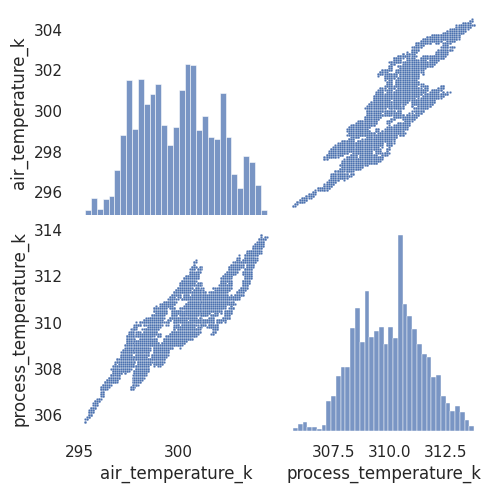

In [206]:
sns.pairplot(data[['air_temperature_k','process_temperature_k']], plot_kws={"s": 3});

In [207]:
# mereduksi fitur
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(data[['air_temperature_k','process_temperature_k']])
data['degree'] = pca.transform(data.loc[:, ('air_temperature_k','process_temperature_k')]).flatten()
data.drop(['air_temperature_k','process_temperature_k'], axis=1, inplace=True)

In [208]:
data.head()

rotational_speed_rpm  torque_nm  tool_wear_min  machine_failure    degree
0                1551.0       42.8            0.0              0.0  2.367016
1                1408.0       46.3            3.0              0.0  2.227552
2                1498.0       49.4            5.0              0.0  2.425024
3                1433.0       39.5            7.0              0.0  2.285560
4                1408.0       40.0            9.0              0.0  2.227552

### Split Train Test
Membagi dataset ke dalam train dan split dengan presentasi 80:20

In [219]:
# memperbarui data kategorikal
numerical_features = ['degree', 'rotational_speed_rpm', 'torque_nm', 'tool_wear_min']
# split data train test
from sklearn.model_selection import train_test_split

X = data.drop(["machine_failure"],axis =1)
y = data["machine_failure"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [220]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 10000
Total # of sample in train dataset: 8000
Total # of sample in test dataset: 2000


### Normalization

In [224]:
# Normalisasi data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Normalize Training Data
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
print('Normalized Training Data\n')
X_train[numerical_features].head()

Normalized Training Data



degree  rotational_speed_rpm  torque_nm  tool_wear_min
9216  1.069534             -0.385009   0.368460      -0.186566
7324 -0.057599              1.564886  -1.344708       1.056056
918   2.624715             -0.362788  -0.152503       1.276267
5902 -0.443196              0.331619  -0.463078       1.229079
2807  0.206799             -0.479449   0.188127      -0.029272

In [225]:
# Normalize Testing Data
scaler.fit(X_test[numerical_features])
X_test[numerical_features] = scaler.transform(X_test.loc[:, numerical_features])
print('Normalized Testing Data\n')
X_test[numerical_features].head()

Normalized Testing Data



degree  rotational_speed_rpm  torque_nm  tool_wear_min
2656  0.148006             -1.087157   1.155282       1.058439
445   1.162356              1.431366  -1.325876      -0.599061
9505  0.191468             -0.633369   0.025649      -1.333991
332   1.200263             -0.015083   0.035735      -1.693637
4168 -0.880496              0.518118  -0.942608       0.214052

## Modelling
- Membuat model machine learning untuk menyelesaikan permasalahan.
- Menjelaskan tahapan dan parameter yang digunakan pada proses pemodelan.
- Menjelaskan kelebihan dan kekurangan dari setiap algoritma yang digunakan.
- Jika menggunakan satu algoritma pada solution statement, lakukan proses improvement terhadap model dengan hyperparameter tuning. Jelaskan proses improvement yang dilakukan.
- Jika menggunakan dua atau lebih algoritma pada solution statement, maka pilih model terbaik sebagai solusi. Jelaskan mengapa memilih model tersebut sebagai model terbaik.

### Metrik
Membuat metrik yang akan digunakan untuk evaluasi, menackup nilai accuracy dan *ROC AUC Score* dengan mendefinisikan function.

In [233]:
from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef

In [252]:
# Siapkan dataframe untuk analisis model
import time
model_performance = pd.DataFrame(columns=['Accuracy', 'ROC AUC score','MCC score','time to train','time to predict','total time'])
list(model_performance)

['Accuracy',
 'ROC AUC score',
 'MCC score',
 'time to train',
 'time to predict',
 'total time']

In [263]:
# funsi untuk training sekaligus menyimpan nilai metrik
def train_model(algorith, algorith_name, x_train, x_test, y_train):
  %time
  start = time.time()
  model = algorith.fit(x_train, y_train)
  end_train = time.time()
  y_predictions = model.predict(x_test)
  end_predict = time.time()

  accuracy = accuracy_score(y_test, y_predictions)
  MCC = matthews_corrcoef(y_test, y_predictions)
  ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')

  print("Accuracy: "+ "{:.2%}".format(accuracy))
  print("MCC: "+ "{:.2%}".format(MCC))
  print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))
  print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
  print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
  print("total: "+"{:.2f}".format(end_predict-start)+" s")
  model_performance.loc[algorith_name] = [accuracy, ROC_AUC,MCC,end_train-start,end_predict-end_train,end_predict-start]

### KNeighborsClassifier

In [264]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

train_model(algorith=knc, algorith_name='KNC', x_train=X_train, x_test=X_test, y_train=y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
Accuracy: 96.95%
MCC: 48.80%
ROC AUC score: 68.08%
time to train: 0.01 s
time to predict: 0.08 s
total: 0.09 s


### RandomForestClassifier



In [265]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
train_model(algorith=rfc, algorith_name='RFC', x_train=X_train, x_test=X_test, y_train=y_train)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.44 µs
Accuracy: 97.05%
MCC: 53.19%
ROC AUC score: 71.93%
time to train: 2.21 s
time to predict: 0.03 s
total: 2.24 s


### Support Vector Classification

In [266]:
from sklearn.svm import SVC

svc = SVC(probability=True)

train_model(algorith=svc, algorith_name='SVC', x_train=X_train, x_test=X_test, y_train=y_train)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10.5 µs
Accuracy: 96.85%
MCC: 40.89%
ROC AUC score: 59.82%
time to train: 1.71 s
time to predict: 0.07 s
total: 1.78 s


### GaussianNB

In [267]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

train_model(algorith=gnb, algorith_name='GaussianNB', x_train=X_train, x_test=X_test, y_train=y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs
Accuracy: 95.30%
MCC: 17.71%
ROC AUC score: 56.48%
time to train: 0.01 s
time to predict: 0.00 s
total: 0.01 s


### GradientBoostingClassifier

In [258]:
from sklearn.ensemble import GradientBoostingClassifier

boosting = GradientBoostingClassifier(learning_rate=0.05, random_state=55)

train_model(algorith=boosting, algorith_name='GradientBoostingClassifier', x_train=X_train, x_test=X_test, y_train=y_train)

CPU times: user 0 ns, sys: 3 µs, total: 3 µs
Wall time: 5.96 µs
Accuracy: 97.20%
MCC: 52.01%
ROC AUC score: 67.58%
time to train: 1.13 s
time to predict: 0.01 s
total: 1.14 s


In [259]:
model_performance

Accuracy  ROC AUC score  MCC score  time to train  \
KNC                           0.9695       0.680832   0.487984       0.012843   
RFC                           0.9695       0.725066   0.526269       1.029089   
SVC                           0.9685       0.598164   0.408891       0.970071   
GaussianNB                    0.9530       0.564832   0.177081       0.006801   
GradientBoostingClassifier    0.9720       0.675812   0.520065       1.133278   

                            time to predict  total time  
KNC                                0.063101    0.075944  
RFC                                0.021388    1.050478  
SVC                                0.042044    1.012115  
GaussianNB                         0.001753    0.008554  
GradientBoostingClassifier         0.006184    1.139462

## Evaluation
- Menyebutkan metrik evaluasi yang digunakan.
- Menjelaskan hasil proyek berdasarkan metrik evaluasi.
- Metrik evaluasi yang digunakan harus sesuai dengan konteks data, problem statement, dan solusi yang diinginkan.
- Menjelaskan metrik evaluasi yang digunakan untuk mengukur kinerja model. Misalnya, menjelaskan formula metrik dan bagaimana metrik tersebut bekerja.

### Accuracy
Merupakan nilai yang didapatlan dari pembagian dari jumlah prediksi yang benar dengan jumlah total prediksi dengan rentang 0-1 atau diubah ke persentase 0-100%.

![rumus accuracy](https://cdn-images-1.medium.com/max/800/1*R6jP_uvlkcxtQSa264N3Sw.png)

Source by [[analyticsvidhya](https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions)]

Metrik akurasi memiliki keterbatasan dimana ketika digunakan untuk data Imbalance maka dapat menimbulkan kesalahan [[towardsdatascience](https://towardsdatascience.com/8-metrics-to-measure-classification-performance-984d9d7fd7aa)].

### ROC AUC
Kurva ROC sangat cocok digunakan untuk data yang imbalance. AUC merupakan nilai yang berada dibawah kurva TPR(*true positive rate*) - FPR (*false positive rate*) [[analyticsvidhya](https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions)].

![grafik roc](https://cdn-images-1.medium.com/max/800/1*bpjCSt38NydElzPf6O5Xng.png)

Source by [analyticsvidhya](https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions)

# MCC(Matthews Correlation Coefficient)
MCC dikenal sebagai salah satu metode terkenal dalam menilai performa suatu model klasifikasi. Metrik ini berfungsi sebagai koefisien korelasi yang menggambarkan sejauh mana hubungan antara hasil klasifikasi yang teramati dengan hasil klasifikasi yang diprediksi. Rentang nilai MCC mirip dengan koefisien korelasi lainnya, yaitu antara -1,0 hingga +1,0. Apabila nilai MCC mencapai +1, hal ini menunjukkan bahwa model memiliki performa yang optimal atau sempurna [[medium](https://towardsdatascience.com/8-metrics-to-measure-classification-performance-984d9d7fd7aa)].

![mcc](https://miro.medium.com/v2/resize:fit:786/format:webp/1*ju2jMm4IsJmQzjYU8l8Mig.png)

source by [medium](https://towardsdatascience.com/8-metrics-to-measure-classification-performance-984d9d7fd7aa)

In [260]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'ROC AUC score': '{:.2%}',
                                                                     'MCC score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

Berdasarkan metrik tersebut, terdapat model yang memiliki akurasi tinggi namun nilai ROC AUC dan MCC yang rendah, dan dikarenakan dataset bersifat imbalance maka matrik untuk rujukan utama yaitu ROC AUC dan MCC, sehingga didapatkan 3 model terbaik adalah KNN, RFC dan GradientBoostingClassifier.

In [261]:
model_dict = {'KNC': knc, 'RFC': rfc, 'GradientBoostingClassifier': boosting, 'SVC':svc, 'GaussianNB':gnb}

In [262]:
prediksi = X_test.iloc[:-50].copy()
pred_dict = {'y_true':y_test[:-50]}
for name, model in model_dict.items():
  pred_dict['prediksi_'+name] = model.predict(prediksi)
pd.DataFrame(pred_dict)

y_true  prediksi_KNC  prediksi_RFC  prediksi_GradientBoostingClassifier  \
2656     0.0           0.0           0.0                                  0.0   
445      0.0           0.0           0.0                                  0.0   
9505     0.0           0.0           0.0                                  0.0   
332      0.0           0.0           0.0                                  0.0   
4168     0.0           0.0           0.0                                  0.0   
...      ...           ...           ...                                  ...   
7093     0.0           0.0           0.0                                  0.0   
2101     0.0           0.0           0.0                                  0.0   
5609     0.0           0.0           1.0                                  0.0   
4842     0.0           0.0           0.0                                  0.0   
6082     0.0           0.0           0.0                                  0.0   

      prediksi_SVC  prediksi_GaussianNB  
2656           0.0                  0.0  
445            0.0                  0.0  
9505           0.0                  0.0  
332            0.0                  0.0  
4168           0.0                  0.0  
...            ...                  ...  
7093           0.0                  0.0  
2101           0.0                  0.0  
5609           0.0                  0.0  
4842           0.0                  0.0  
6082           0.0                  0.0  

[1950 rows x 6 columns]